# Difference between fare within passenger class on survival

With the data provided in the csv, I attempted to explore the differences between passenger class even further and see whether there was another divide within the chances of survival based on the average fare within the classes. This primarily focuses on the 1st class passengers as their tickets had the greatest variation in price (£512 is the highest, with £5 being the lowest - that may be a mistake).  

I import the modules I will be using and the url. I am using seaborn to make it easier to show the differences within the passenger classes and it makes graphing more intuitive in my opinion.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


I find the maximum and minimum fares for all the passenger classes. I have to create no_zeros as using .min() on the original titanic DataFrame returned £0, to get the actual paid minimum fare I had to create a DataFrame that did not include the zeros.

In [3]:
max = titanic.groupby(['pclass'])['fare'].max()
no_zeros = titanic[titanic['fare'] != 0]
min = no_zeros.groupby(['pclass'])['fare'].min()
print(max)
min

pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64


pclass
1     5.0000
2    10.5000
3     4.0125
Name: fare, dtype: float64

I create a table to find the average fare per class of passengers that either survived or did not. However, this is not the easiest to read so I turn it into a pivot table to make comparison easier. 

In [16]:
table = titanic.groupby(['survived', 'pclass'])['fare'].apply(lambda x: stats.trim_mean(x, 0.1)).reset_index()
print(table)
table_pivot = table.pivot(index='pclass', columns='survived', values='fare')
table_pivot.rename(columns = {0:'No', 1:'Yes'}, inplace = True)
print(table_pivot)

   survived  pclass       fare
0         0       1  52.794853
1         0       2  16.831170
2         0       3  10.828466
3         1       1  79.268107
4         1       2  20.671596
5         1       3  11.447852
survived         No        Yes
pclass                        
1         52.794853  79.268107
2         16.831170  20.671596
3         10.828466  11.447852


I then plot a graph of my data, it is clear that whilst there is not a large difference in fares within the 2nd and 3rd passenger classes and whether they survive or not, within the 1st class there is a large gap of approximately £30 between the passengers that survived and those that did not. I use a lambda function to apply a trimmed mean procedure which removes the top and bottom 10% of the fare data to provide a more robust figure.

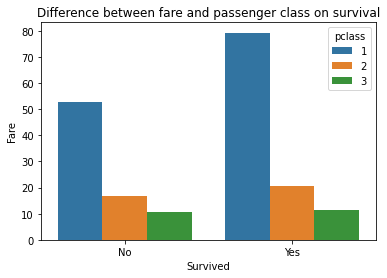

In [10]:
fig, ax = plt.subplots()
sns.barplot(data=table, x='survived', y='fare', hue='pclass')
plt.xlabel('Survived')
plt.ylabel('Fare')
ax.set_xticklabels(['No', 'Yes'])
plt.title('Difference between fare and passenger class on survival')

plt.show()

 #### Conclusions
From the results, it appears that there was a gap between the survival chances of passengers, however only within the 1st class. A number of other reasons could occur for this result, one being the sex of the members in first class. As women and children were first onboard the lifeboats, rich men may not have gotten a seat on one. Another is the wider variety in fare prices within 1st class, with a difference of £500 between the highest and lowest fare price the mean may not have been the best way to analyse the data and the median may have been more suitable to counteract outliers. 